# 0.0. Imports 

In [1]:
import pandas as pd
import inflection
import math
import datetime
from IPython.display import Image

## 0.1. Helper Functions

## 0.2. Loading data

In [2]:
df_sales_raw = pd.read_csv( 'dataset/train.csv', low_memory=False )
df_store_raw = pd.read_csv( 'dataset/store.csv', low_memory=False )

# merge

df_raw = pd.merge( df_sales_raw, df_store_raw, how = 'left', on= 'Store' )

# 1.0 DESCRIBE DATA - Passo 01

In [3]:
df1 = df_raw.copy()

## 1.1 Rename Columns

In [4]:
cols_old = ['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth','CompetitionOpenSinceYear',
       'Promo2', 'Promo2SinceWeek','Promo2SinceYear', 'PromoInterval']

snakecase = lambda x: inflection.underscore ( x )

cols_new = list( map( snakecase, cols_old ) )

#rename 
df1.columns = cols_new

## 1.2. Data Dimension

In [5]:
print( 'Number of rows: {}'.format( df1.shape[0] ) )
print( 'Number of rows: {}'.format( df1.shape[1] ) )

Number of rows: 1017209
Number of rows: 18


## 1.3. Data types

In [6]:
df1['date'] = pd.to_datetime( df1['date'] )
df1.dtypes

store                                    int64
day_of_week                              int64
date                            datetime64[ns]
sales                                    int64
customers                                int64
open                                     int64
promo                                    int64
state_holiday                           object
school_holiday                           int64
store_type                              object
assortment                              object
competition_distance                   float64
competition_open_since_month           float64
competition_open_since_year            float64
promo2                                   int64
promo2_since_week                      float64
promo2_since_year                      float64
promo_interval                          object
dtype: object

## 1.4 Number of NA 

In [7]:
df1.isna().sum()

store                                0
day_of_week                          0
date                                 0
sales                                0
customers                            0
open                                 0
promo                                0
state_holiday                        0
school_holiday                       0
store_type                           0
assortment                           0
competition_distance              2642
competition_open_since_month    323348
competition_open_since_year     323348
promo2                               0
promo2_since_week               508031
promo2_since_year               508031
promo_interval                  508031
dtype: int64

## 1.5. Fillout NA

In [8]:
df1.sample()

,store,day_of_week,date,sales,customers,open,promo,state_holiday,school_holiday,store_type,assortment,competition_distance,competition_open_since_month,competition_open_since_year,promo2,promo2_since_week,promo2_since_year,promo_interval
1008099,925,3,2013-01-09,4971,817,1,1,0,0,c,a,470.0,3.0,2007.0,1,1.0,2012.0,"Jan,Apr,Jul,Oct"


In [8]:
#promo_since_week
df1['promo2_since_week'] = df1.apply(lambda x: x['date'].week if math.isnan( x['promo2_since_week'] ) else x['promo2_since_week'], axis=1 )

#promo2_since_year
df1['promo2_since_year'] = df1.apply(lambda x: x['date'].year if math.isnan( x['promo2_since_year'] ) else x['promo2_since_year'], axis=1 )

#competition_distance
df1['competition_distance'] = df1['competition_distance'].apply( lambda x: 200000.0 if math.isnan(x) else x )


#competition_open_since_month
df1['competition_open_since_month'] = df1.apply( lambda x: x['date'].month if math.isnan( x['competition_open_since_month'] ) else x['competition_open_since_month'], axis=1 )


#competition_open_since_year
df1['competition_open_since_year'] = df1.apply(lambda x: x['date'].year if math.isnan( x['competition_open_since_year'] ) else x['competition_open_since_year'], axis=1 )

#promo_interval
month_map = {1: 'Jan', 2: 'Fev', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec' }

df1['promo_interval'].fillna(0, inplace=True)

df1['month_map'] = df1['date'].dt.month.map( month_map )

df1['is_promo'] = df1[['promo_interval', 'month_map' ]].apply( lambda x: 0 if x['promo_interval'] == 0 else 1 if x['month_map'] in x['promo_interval'].split(',') else 0, axis=1 )

In [10]:
df1.sample(5).T

,729684,972567,108199,374824,695622
store,145,1073,45,77,648
day_of_week,7,7,6,2,3
date,2013-09-15 00:00:00,2013-02-10 00:00:00,2015-04-25 00:00:00,2014-08-05 00:00:00,2013-10-16 00:00:00
sales,0,0,5743,8666,4582
customers,0,0,436,706,512
open,0,0,1,1,1
promo,0,0,0,1,0
state_holiday,0,0,0,0,0
school_holiday,0,0,0,1,0
store_type,a,a,d,d,d


In [11]:
df1.isna().sum()

store                           0
day_of_week                     0
date                            0
sales                           0
customers                       0
open                            0
promo                           0
state_holiday                   0
school_holiday                  0
store_type                      0
assortment                      0
competition_distance            0
competition_open_since_month    0
competition_open_since_year     0
promo2                          0
promo2_since_week               0
promo2_since_year               0
promo_interval                  0
month_map                       0
is_promo                        0
dtype: int64

## 1.6. Change columns Data types

In [9]:

# change competition date
df1['competition_open_since_year'] = df1['competition_open_since_year'].astype( int )
df1['competition_open_since_month'] = df1['competition_open_since_month'].astype( int )

# change promo date
df1['promo2_since_year'] = df1['promo2_since_year'].astype( int )
df1['promo2_since_week'] = df1['promo2_since_week'].astype( int )



# 2.0. Feature Engineering - PASSO 02

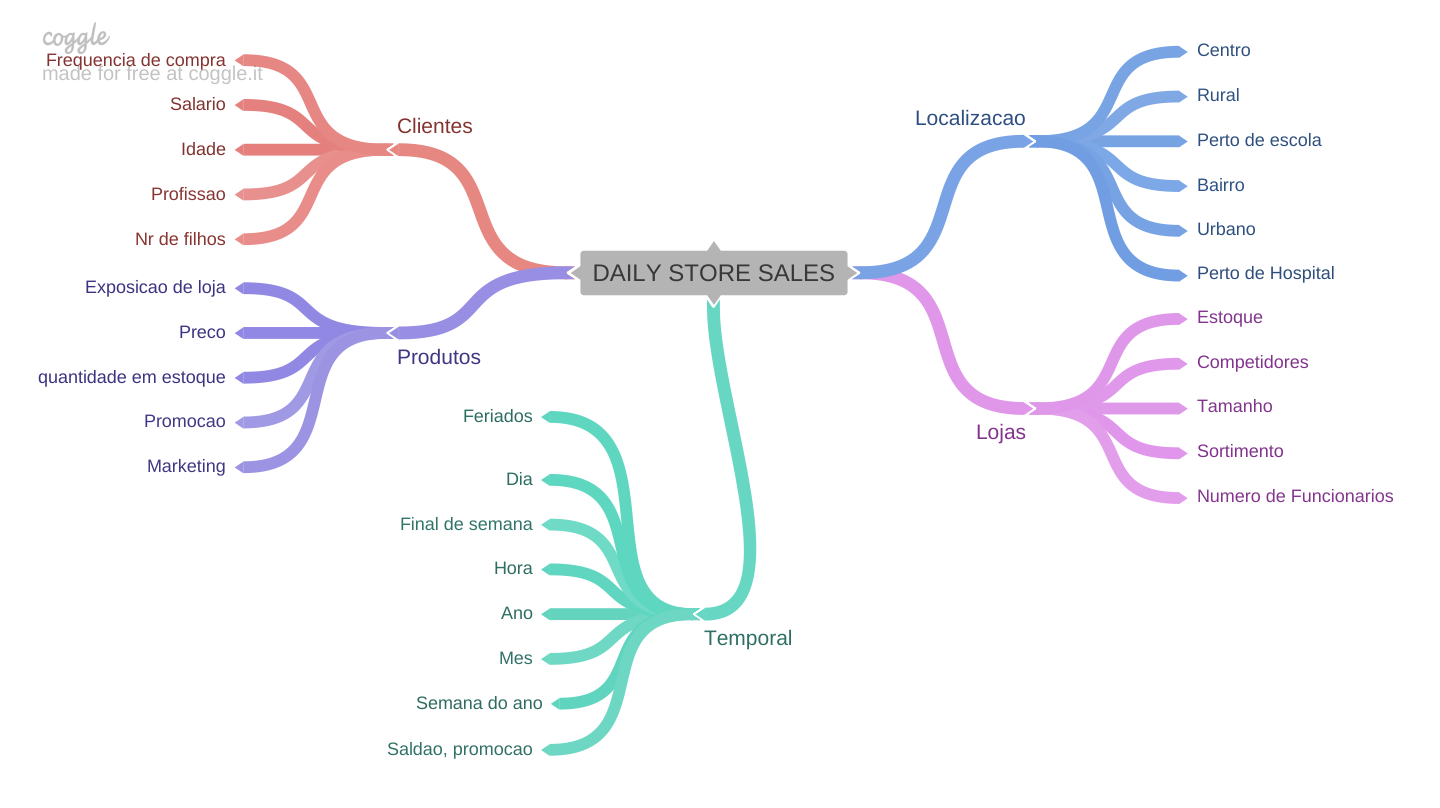

In [3]:
Image('img/MindMapHipothesis.png')

# 2.1. Criacao das Hipoteses

In [10]:
df2 = df1.copy()

## 2.1.1. Hipoteses Loja

**1.** Lojas com maior quadro de funcionarios deveriam vender mais.

**2.** Lojas com maior estoque deveriam vender mais.

**3.** Lojas com maior porte deveriam vender mais.

**4.** Lojas com menor porte deveriam vender menos.

**5.** Lojas com maior sortimento deveriam vender mais.

## 2.1.2. Hipoteses Produto

**1.** Lojas que investem mais em Marketing deveriam vender mais.

**2.** Lojas que expoer mais os produtos nas vitrines deveriam vender mais.

**3.** Lojas que tem precos menores nos produtos deveriam vender mais.

**4.** Lojas que tem precos menores por mais tempo nos produtos deveriam vender mais.

**5.** Lojas que tem uma quantidade de estoque maior deveriam vender mais

## 2.1.3. Hipoteses Tempo

**1.** Lojas que tem mais feriados elas deveriam vender menos.

**2.** Lojas que abrem nos primeiro 6 meses deveriam vender mais.

**3.** Lojas que abrem nos finais de semanas deveriam vender mais.

**4.** Lojas que saldao mais frequentes deveriam vender mais.

**5.** Lojas que ficam abertas por maior periodo de horas deveriam vender mais.

# 2.2 Lista final de Hipoteses

**1.** Lojas com maior sortimento deveriam vender mais.

**2.** Lojas com maior porte deveriam vender mais.

**3.** Lojas com menor porte deveriam vender menos.

**4.** Lojas com promocoes ativas por mais tempo deveriam vender mais.

**5.** Lojas com mais promocoes consecutivas deveriam vender mais.

**6.** Lojas com mais dias de promocao deveriam vender mais.

**7.** Lojas com abertas durante o feriado de natal deveriam vender mais.

**8.** Lojas deveriam vender mais ao longo dos anos.

**9.** Lojas deveriam vender mais no segundo semestre do ano

**10.** Lojas deveriam vender mais depois do dia 10 de cada mes.

**11.** Lojas deveriam menos aos finais de semana.

**12.** Lojas deveriam vender menos durante os feriados escolares.

**13.** Lojas com competidores mais proximos deveriam vende menos.

# 2.3. Feature Engineering

In [11]:
# year
df2['year'] = df2['date'].dt.year

# month
df2['month'] = df2['date'].dt.month

# week of year
df2['week_of_year'] = df2['date'].dt.weekofyear

#year week
df2['year_week'] = df2['date'].dt.strftime('%T-%W')

# day
df2['day'] = df2['date'].dt.day

#competition since
df2['competition_since'] = df2.apply( lambda x: datetime.datetime( year= x['competition_open_since_year'], month=x['competition_open_since_month'], day=1 ), axis=1 )
#code for difference
df2['competition_time_mouth'] = ( ( df2['date'] - df2['competition_since'] )/30).apply(lambda x: x.days).astype( int )

#promo since

#assortment
#state holiday


In [12]:
#promo since
df2['promo_since'] =  df2['promo2_since_year'].astype(str) + '-' + df2['promo2_since_week'].astype( str )

df2['promo_since'] =  df2['promo_since'].apply(lambda x: datetime.datetime.strptime(x + '-1', '%Y-%W-%w') - datetime.timedelta( days=7 ) )

df2['promo_time_week'] =  ((df2['date'] - df2['promo_since'])/7).apply(lambda x: x.days).astype(int)

In [13]:
#assortment
df2['assortment'] = df2['assortment'].apply(lambda x: 'basic' if x == 'a'  else 'extra' if x == 'b' else 'extended' )

#state holiday
#df1['state_holiday'] = df1['state_holiday'].apply(lambda x: 'public_holiday' if x == 'a' else 'easter_holiday' if x == 'b' else 'christmas' if x == 'c' else 'regular_day')

df2['state_holiday'] = df2['state_holiday'].apply( lambda x: 'public_holiday' if x == 'a' else 'easter_holiday' if x == 'b' else 'christmas' if x == 'c' else 'regular_day' )

In [28]:
df2.head().T

,0,1,2,3,4
store,1,2,3,4,5
day_of_week,5,5,5,5,5
date,2015-07-31 00:00:00,2015-07-31 00:00:00,2015-07-31 00:00:00,2015-07-31 00:00:00,2015-07-31 00:00:00
sales,5263,6064,8314,13995,4822
customers,555,625,821,1498,559
open,1,1,1,1,1
promo,1,1,1,1,1
state_holiday,regular_day,regular_day,regular_day,regular_day,regular_day
school_holiday,1,1,1,1,1
store_type,c,a,a,c,a


# 3.0. Filtragem de variaveis - Video 03

In [14]:
df3 = df2.copy()

## 3.1. Filtragem das linhas

In [20]:
df3 = df3[(df3['open'] != 0) & (df3['sales'] > 0)]

## 3.1. Selecao das linhas

In [22]:
cols_drop = ['customers', 'open', 'promo_interval', 'month_map']
df3 = df3.drop( cols_drop, axis = 1 )

In [24]:
df3.columns

Index(['store', 'day_of_week', 'date', 'sales', 'promo', 'state_holiday',
       'school_holiday', 'store_type', 'assortment', 'competition_distance',
       'competition_open_since_month', 'competition_open_since_year', 'promo2',
       'promo2_since_week', 'promo2_since_year', 'is_promo', 'year', 'month',
       'week_of_year', 'year_week', 'day', 'competition_since',
       'competition_time_mouth', 'promo_since', 'promo_time_week'],
      dtype='object')